In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as srn

In [2]:
#31 árvores com circunferencia, altura e volume 
base = pd.read_csv('trees.csv')
display(base.shape)
display(base.head())

(31, 3)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [3]:
#Criação do histograma, considerando somente o segundo atributo da base de dados e com duas divisões (bins)
# A variável 'h' armazena as faixas de valores de Height
h = np.histogram(base.iloc[:,1], bins = 6)
display(h)

(array([4, 2, 5, 7, 9, 4], dtype=int64),
 array([63., 67., 71., 75., 79., 83., 87.]))

Text(0.5, 0, 'Altura')

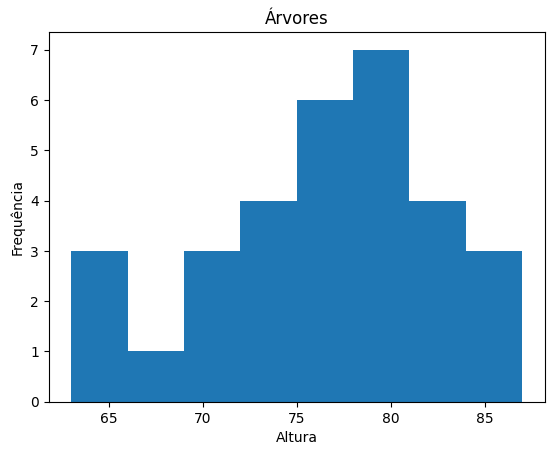

In [4]:
#visualização do histograma com 6 divisões (bins)
plt.hist(base.iloc[:,1],bins=8)
plt.title('Árvores')
plt.ylabel('Frequência')
plt.xlabel('Altura')

[Text(0.5, 1.0, 'Árvores')]

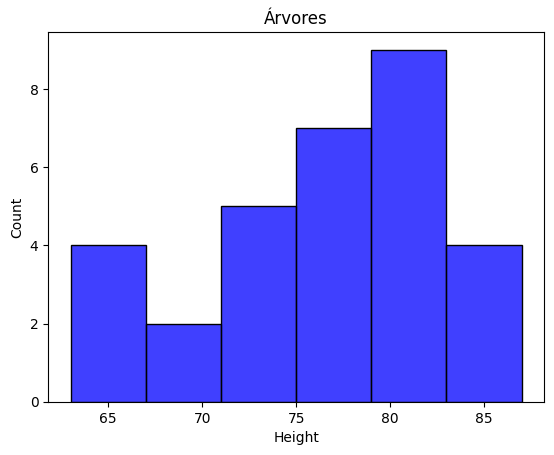

In [5]:
#Histograma com a linha de distribuição de frequência, ocm 6 divisões (bins)
#kde = linha de densidade 
srn.histplot(base.iloc[:,1],kde=False, bins=6, color='blue').set(title='Árvores')

[Text(0.5, 1.0, 'Árvores')]

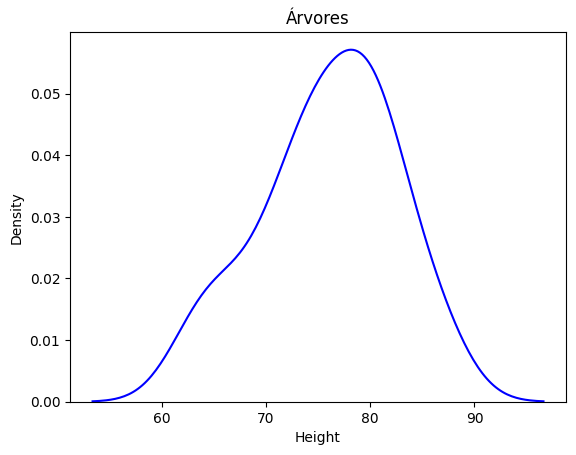

In [6]:
#método kdeplot para densidade
srn.kdeplot(base.iloc[:,1],color='blue').set(title='Árvores')

[Text(0.5, 1.0, 'Árvores')]

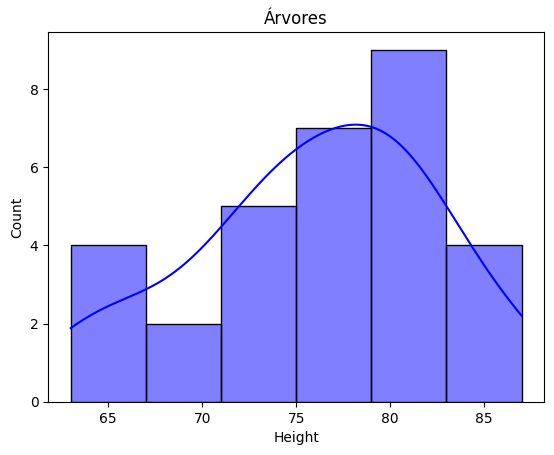

In [7]:
srn.histplot(base.iloc[:,1],kde=True, bins=6, color='blue').set(title='Árvores')

Text(0, 0.5, 'Volume')

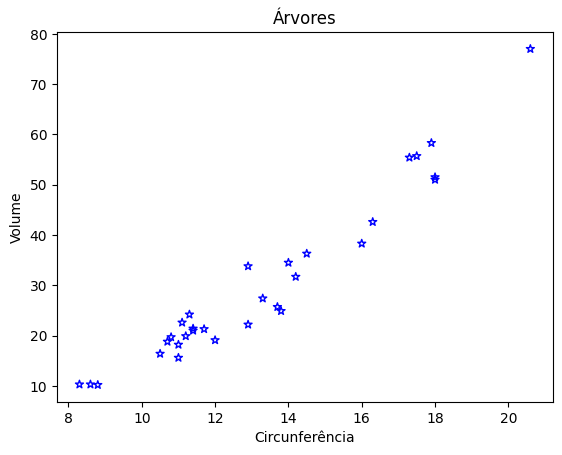

In [8]:
#Gráfico de dispersão considerando o volume e a dispersão 
plt.scatter(x=base.Girth, y=base.Volume, color='blue',facecolors='none', marker='*')
plt.title('Árvores')
plt.xlabel('Circunferência')
plt.ylabel('Volume')

Text(0, 0.5, 'Volume')

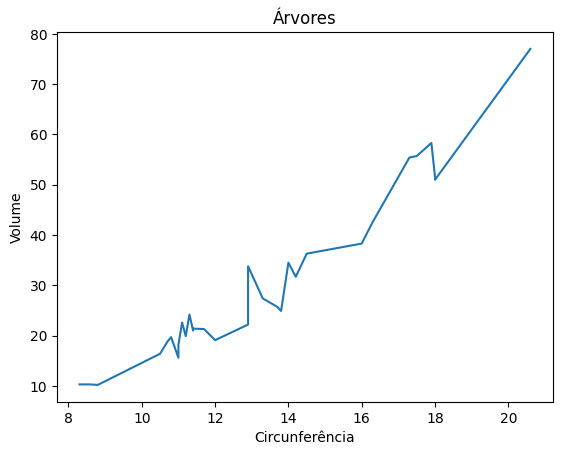

In [9]:
#Gráfico de linha considerando o volume e o atributo "girth" - sem marker 
plt.plot(base.Girth,base.Volume)
plt.title('Árvores')
plt.xlabel('Circunferência')
plt.ylabel('Volume')


<Axes: xlabel='Girth', ylabel='Volume'>

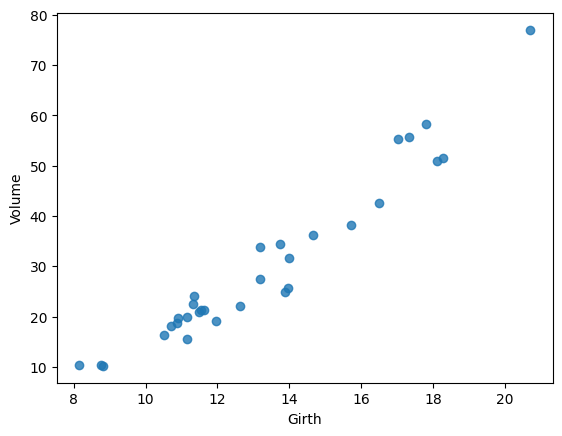

In [10]:
#Gráfico de dispersão com 'afastamento' dos dados (jitter)
# fit_reg linha de tendência 
srn.regplot(x=base.Girth,y=base.Volume,data=base,x_jitter=0.3,fit_reg=False)

Gráfico de dispersão com legendas
carregando uma nova base de dados 


In [11]:
new_base = pd.read_csv('co2.csv')
new_base.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [12]:
#criar duas variáveis para cada atributo (x = conc e y = uptake)
x = new_base.conc
y = new_base.uptake

In [13]:
unicos = list(set(new_base.Treatment))
unicos

['chilled', 'nonchilled']

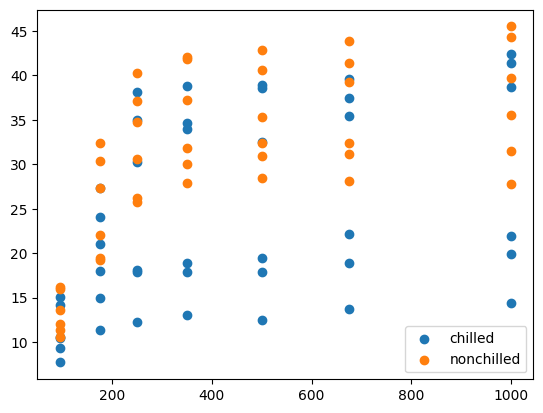

In [14]:
#Percorre cada tipo de tratamento (chilled e nonchilled) e cria um gráfico de dispersão
for i in range(len(unicos)):
    indice = new_base.Treatment == unicos[i]
    plt.scatter(x[indice],y[indice],label = unicos[i])
plt.legend(loc = 'lower right')

Divisão da tela (subgráficos)

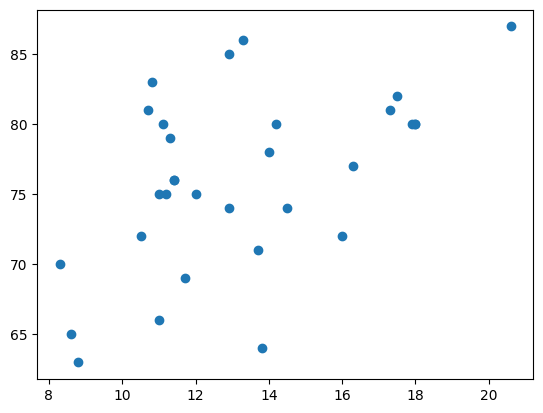

In [15]:
#Girth com volume 
plt.scatter(base.Girth, base.Height)


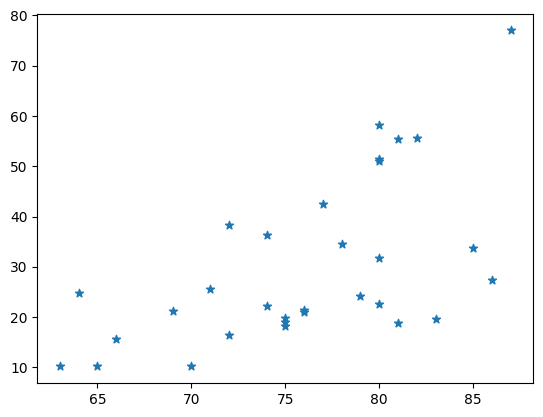

In [16]:
#height com volume 
plt.scatter(base.Height,base.Volume,marker = '*')

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

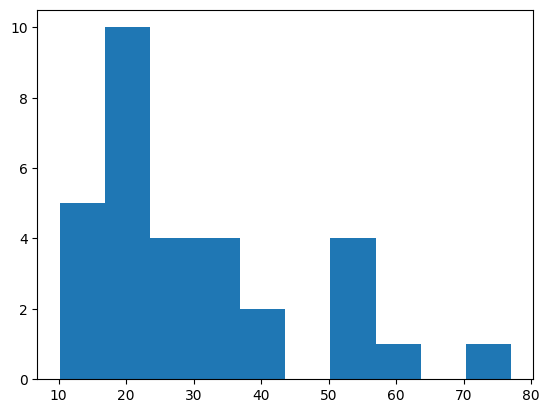

In [17]:
#histograma volume
plt.hist(base.Volume)

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

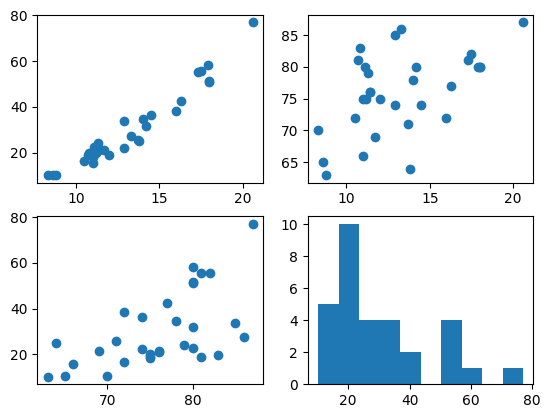

In [18]:
#imprimindo juntos
# Criação de figura, no qual os gráficos serão posicionados
plt.figure(1)
plt.subplot(2,2,1)                          # (2,2)-> significa que será uma figura de 2 linhas e 2 colunas, o terceiro número 
plt.scatter(base.Girth, base.Volume)        # indica a posição, dentre as 4 posições possíveis na figura 
plt.subplot(2,2,2)
plt.scatter(base.Girth, base.Height)
plt.subplot(2,2,3)
plt.scatter(base.Height, base.Volume)
plt.subplot(2,2,4)
plt.hist(base.Volume)


Text(0.5, 0, 'Volume')

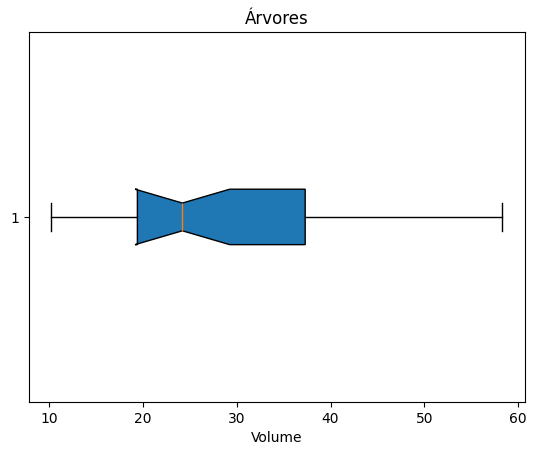

In [19]:
#Geração de boxplot 
# patch_artist = True preenche , showfliers outliers 
plt.boxplot(base.Volume, vert = False,showfliers = False, notch = True, patch_artist= True)
plt.title('Árvores')
plt.xlabel('Volume')

Text(0.5, 0, 'Dados')

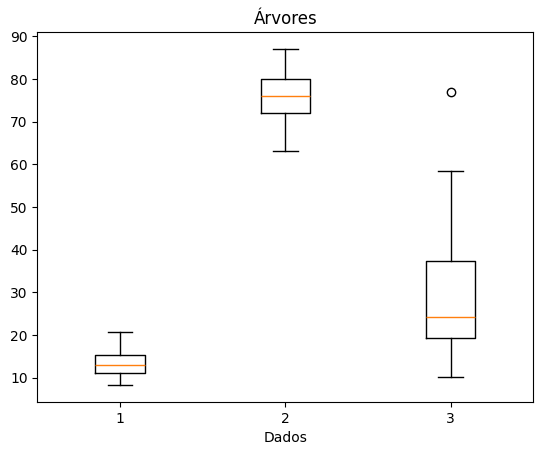

In [20]:
# dados por linha
plt.boxplot(base)
plt.title('Árvores')
plt.xlabel('Dados')


Text(0.5, 0, 'Dados')

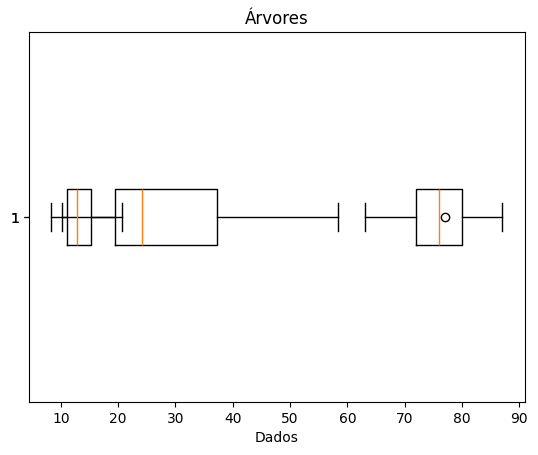

In [21]:
#Geração de 3 boxplot, cada um mostrado informações diferentes
plt.boxplot(base.Volume, vert = False)
plt.boxplot(base.Girth, vert = False)
plt.boxplot(base.Height,vert=False)
plt.title('Árvores')
plt.xlabel('Dados')

Gráfico de Barras e setores

In [23]:
base = pd.read_csv('insect.csv')
base.shape 

(72, 2)

In [25]:
base.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


In [33]:
#Agrupamento dos dados baseados no atributo 'spray', contando e somando os registros
agrupado = base.groupby(['spray'])['count'].sum()
agrupado

spray
A    174
B    184
C     25
D     59
E     42
F    200
Name: count, dtype: int64

<Axes: xlabel='spray'>

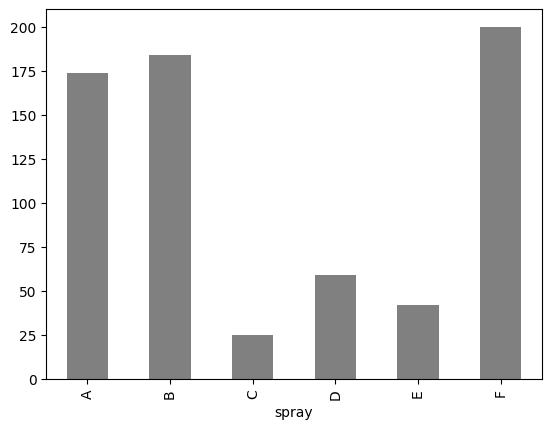

In [34]:
#Gráfico de barras 
agrupado.plot.bar(color = 'gray')

<Axes: xlabel='spray'>

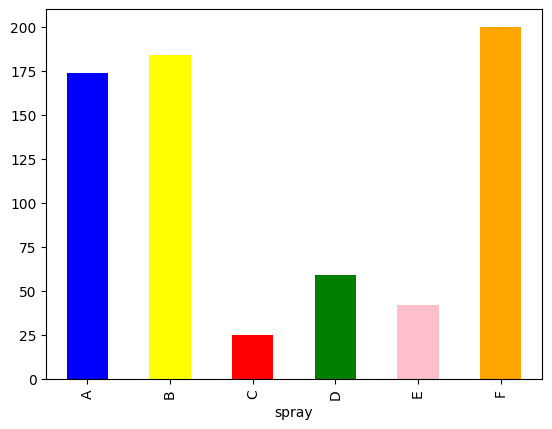

In [37]:
#cores
agrupado.plot.bar(color = ['blue','yellow','red','green','pink','orange'])

<Axes: ylabel='count'>

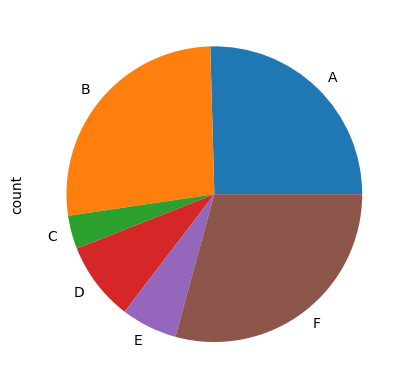

In [39]:
#Gráfico de pizza 
agrupado.plot.pie()

<Axes: ylabel='count'>

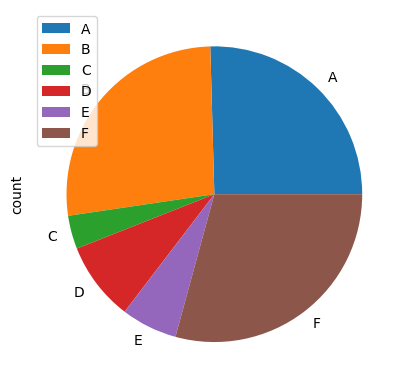

In [41]:
agrupado.plot.pie(legend=True)

In [42]:
base = pd.read_csv('trees.csv')
base.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


Text(0.5, 1.0, 'Árvores')

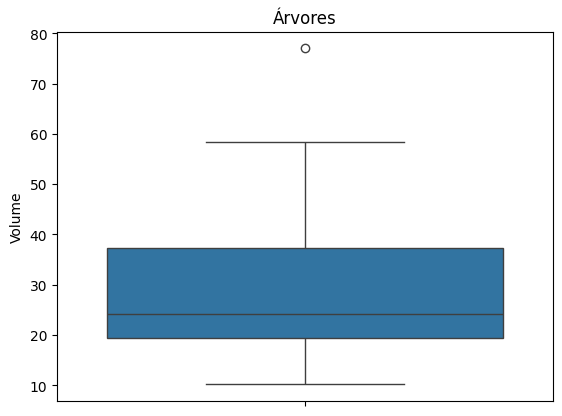

In [43]:
#visualização de um boxplot 
srn.boxplot(data=base.Volume,orient='v').set_title('Árvores')

<Axes: >

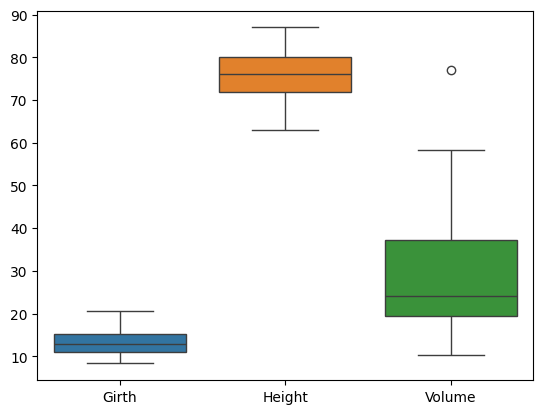

In [44]:
#Visualização de vários boxplots na mesma imagem 
srn.boxplot(data = base)

[Text(0.5, 1.0, 'Volume')]

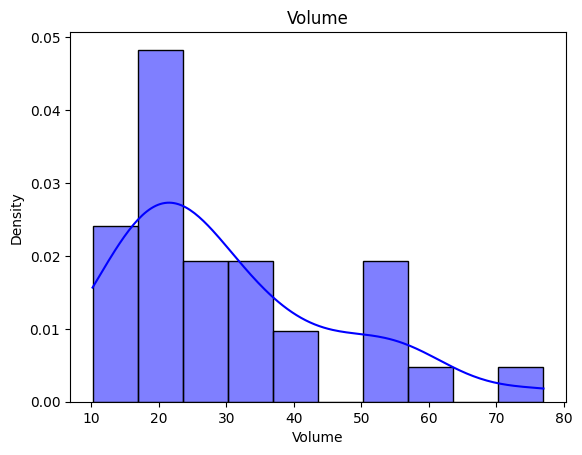

In [45]:
#Histograma com 10 divisões (bins) e com gráfico de densidade (kernel density - suavização)
#stat: count, frequency, probability, percent, density
srn.histplot(base.Volume, color ='blue', kde=True, stat='density', bins=10).set(title='Volume')

In [47]:
#Carregando outra base de dados 
base2 = pd.read_csv('chicken.csv')
base2.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


In [49]:
#criação de novo dataframe agrupando o atributo feed
agrupado = base2.groupby(['feed'])['weight'].sum()
agrupado

feed
casein       3883
horsebean    1602
linseed      2625
meatmeal     3046
soybean      3450
sunflower    3947
Name: weight, dtype: int64

In [51]:
# Novo dataframe somente para testar os filtros do pandas
teste = base2.loc[base2['feed']=='horsebean']
teste

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
5,168,horsebean
6,108,horsebean
7,124,horsebean
8,143,horsebean
9,140,horsebean


[Text(0.5, 1.0, 'horsebean')]

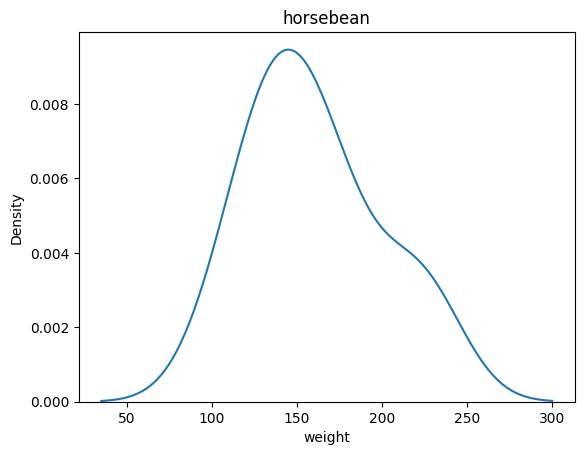

In [52]:
#histograma considerando somente o valor 'horsebean'
#apenas o grafico de densidade neste caso
srn.kdeplot(base2.loc[base2['feed']=='horsebean'].weight).set(title='horsebean')

[Text(0.5, 1.0, 'casein')]

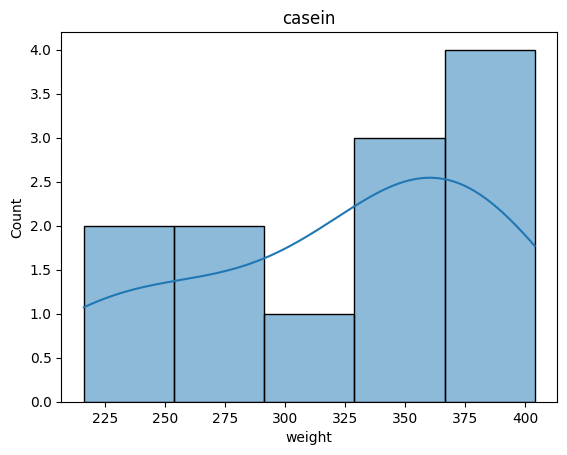

In [53]:
#histograma considerando somente o valor casein
srn.histplot(base2.loc[base2['feed'] == 'casein'].weight, kde = True).set(title='casein')

[Text(0.5, 1.0, 'linseed')]

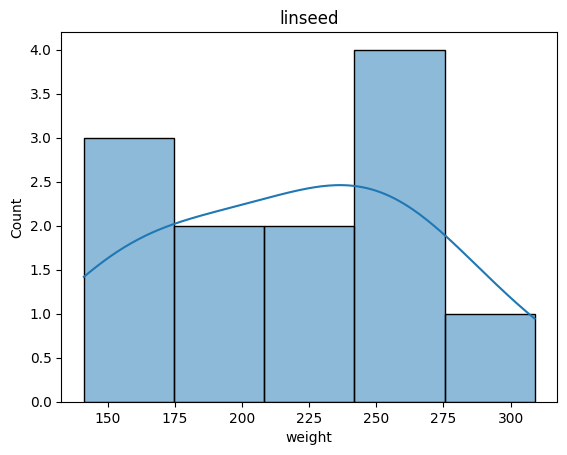

In [54]:
srn.histplot(base2.loc[base2['feed'] == 'linseed'].weight, kde = True).set(title='linseed')

[Text(0.5, 1.0, 'meatmeal')]

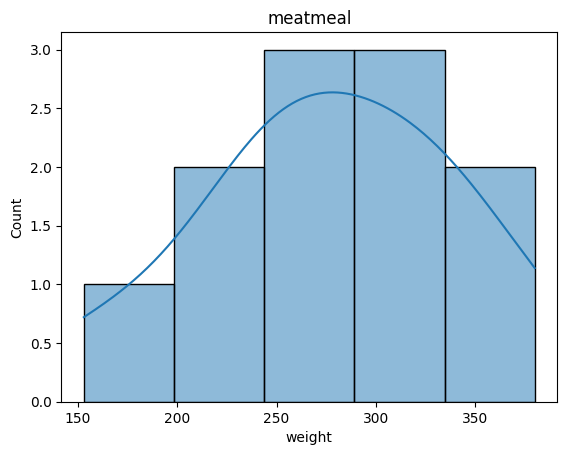

In [55]:
srn.histplot(base2.loc[base2['feed'] == 'meatmeal'].weight, kde = True).set(title='meatmeal')

[Text(0.5, 1.0, 'soybean')]

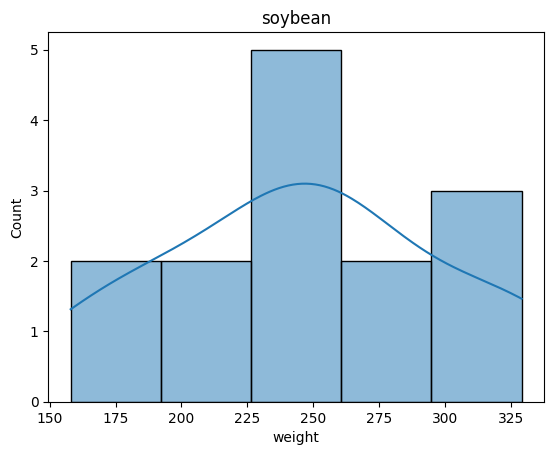

In [57]:
srn.histplot(base2.loc[base2['feed'] == 'soybean'].weight, kde = True).set(title='soybean')

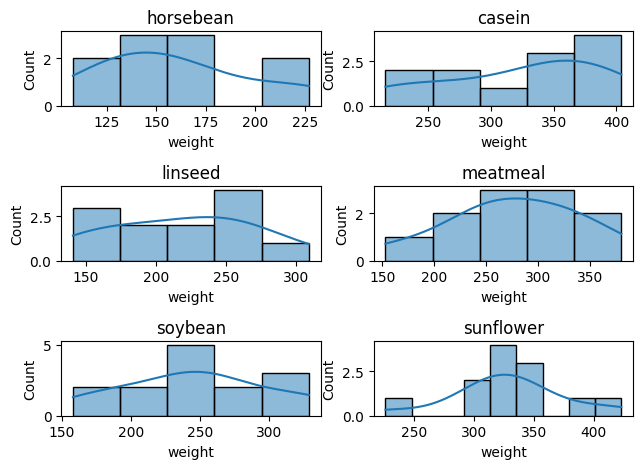

In [59]:
#Criando um dashboard com todos os gráficos
#impressão em gráfico 2x3 -3 linhas 2 colunas
plt.figure()
plt.subplot(3,2,1)
srn.histplot(base2.loc[base2['feed'] =='horsebean'].weight, kde = True).set(title='horsebean')
plt.subplot(3,2,2)
srn.histplot(base2.loc[base2['feed'] == 'casein'].weight, kde = True).set(title='casein')
plt.subplot(3,2,3)
srn.histplot(base2.loc[base2['feed'] == 'linseed'].weight, kde = True).set(title='linseed')
plt.subplot(3,2,4)
srn.histplot(base2.loc[base2['feed'] == 'meatmeal'].weight, kde = True).set(title='meatmeal')
plt.subplot(3,2,5)
srn.histplot(base2.loc[base2['feed'] == 'soybean'].weight, kde = True).set(title='soybean')
plt.subplot(3,2,6)
srn.histplot(base2.loc[base2['feed'] =='sunflower'].weight, kde = True).set(title='sunflower')
#ajusta o layout para não haver sobreposição 
plt.tight_layout()

GRÁFICOS DE DISPERSÃO COM SEABORN

In [60]:
#Carregamento de nova base de dados
base = pd.read_csv('co2.csv')
base.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3
